In [1]:
from datetime import datetime
from datetime import timedelta
from copy import deepcopy
import numpy as np
import pandas as pd
import config
import webbrowser
import itertools
import time
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
def Convert_Twitter_dates_into_days(dates_list):
    twitter_dates_converted = []
    for twitter_page_creation_date in dates_list:
        current_date = datetime.today().strftime('%m/%d/%Y')
        date_format = '%m/%d/%Y'
        current_date_formatted = datetime.strptime(current_date, date_format)   

        twitter_page_creation_date_format = '%m/%d/%Y'
        twitter_page_creation_date_formatted = datetime.strptime(twitter_page_creation_date, twitter_page_creation_date_format)
        Days_of_existence = (current_date_formatted - twitter_page_creation_date_formatted).days
        twitter_dates_converted.append(Days_of_existence)
    return twitter_dates_converted

In [3]:
def Convert_Collections_dates_into_days(dates_list):
    collection_dates_converted = []
    for collection_creation_date in dates_list:
        current_date = datetime.today().strftime('%Y/%m/%d')
        date_format = '%Y/%m/%d'
        current_date_formatted = datetime.strptime(current_date, date_format)   

        collection_date_format = '%Y-%m-%d'
        collection_date_formatted = datetime.strptime(collection_creation_date, collection_date_format)
        Days_of_existence = (current_date_formatted - collection_date_formatted).days
        collection_dates_converted.append(Days_of_existence)
    return collection_dates_converted    

In [4]:
df_before_clean = pd.read_csv('Final_DataFrame_After_Scrape.csv')

In [106]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.reset_option('^display.', silent=True)

In [6]:
df_before_clean_copy = df_before_clean.copy()

In [7]:
replace_map = {"not_requested":0,"requested":1,"approved":2,"verified":3}
df_before_clean_copy['Collection_Listing_Status'] = df_before_clean_copy['Collection_Listing_Status'].map(replace_map)


In [8]:
df_before_clean_copy['Twitter_Page_Is_Verified'] = df_before_clean_copy['Twitter_Page_Is_Verified'].astype(int)

In [9]:
#df_before_clean_copy

In [10]:
Twitter_dates_converted = Convert_Twitter_dates_into_days(df_before_clean_copy['Twitter_Page_Creation_Date'].tolist())

In [11]:
Collection_dates_converted = Convert_Collections_dates_into_days(df_before_clean_copy['Collection_Creation_Date'].tolist())

In [12]:
df_before_clean_copy['Twitter_Page_Creation_Date'] = Twitter_dates_converted
df_before_clean_copy['Collection_Creation_Date'] = Collection_dates_converted

In [13]:
df_before_clean_copy.rename(columns={'Twitter_Page_Creation_Date':'Twitter_Existence_Days','Collection_Creation_Date':'Collection_Existence_Days'},inplace=True)



In [14]:
df_before_clean_copy_2 = df_before_clean_copy.copy()

In [15]:
Collection_30_Day_Volume = df_before_clean_copy_2['Collection_30_Day_Volume']
daily_vol_avg = []
for vol in Collection_30_Day_Volume:
    daily_avg = format((vol/30),'f')
    daily_vol_avg.append(daily_avg)
df_before_clean_copy_2['Daily_Avg_Volume'] =  daily_vol_avg

In [16]:
df_before_clean_copy_2.drop(df_before_clean_copy_2.index[3232],inplace=True)

In [17]:
df_before_clean_copy_2['Daily_Avg_Volume'] = df_before_clean_copy_2['Daily_Avg_Volume'].astype(float)
df_before_clean_copy_2['Items'] = df_before_clean_copy_2['Items'].astype(int)

In [18]:
df_before_clean = df_before_clean_copy_2.drop('Unnamed: 0',axis=1)

In [19]:
df_before_clean.to_csv('df_before_visualize_with_outliers.csv')

In [20]:
df_before_clean.columns

Index(['Collection_Name', 'Category_Art', 'Category_Collectibles',
       'Category_Domain Names', 'Category_Music', 'Category_Photography',
       'Category_Sports', 'Category_Trading Cards', 'Category_Utility',
       'Category_Virtual Worlds', 'Items', 'Owners', 'Floor_Price',
       'Twitter_Page_Followers', 'Twitter_Page_Following',
       'Twitter_Page_Is_Verified', 'Twitter_Existence_Days',
       'Max_Twitter_Retweets', 'Max_Twitter_Replies', 'Max_Twitter_Likes',
       'Max_Twitter_Quotes', 'Collection_Existence_Days',
       'Collection_30_Day_Volume', 'Collection_Listing_Status',
       'Collection_Traits_count', 'Daily_Avg_Volume'],
      dtype='object')

<AxesSubplot:xlabel='Collection_Traits_count'>

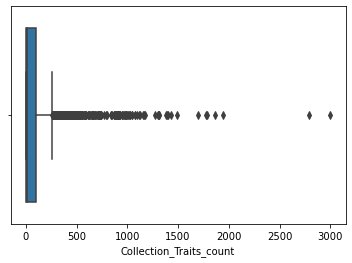

In [21]:
sns.boxplot(df_before_clean['Collection_Traits_count'])

<AxesSubplot:xlabel='Daily_Avg_Volume'>

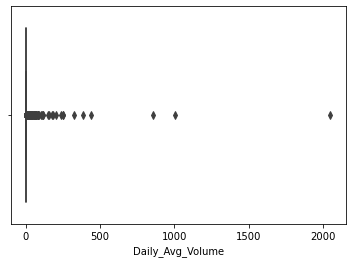

In [22]:
sns.boxplot(df_before_clean['Daily_Avg_Volume'])

<AxesSubplot:xlabel='Collection_30_Day_Volume'>

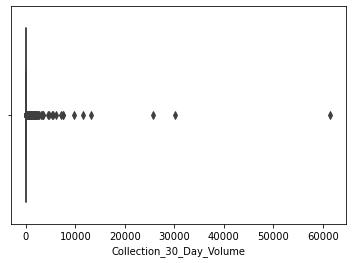

In [23]:
sns.boxplot(df_before_clean['Collection_30_Day_Volume'])

<AxesSubplot:xlabel='Collection_Existence_Days'>

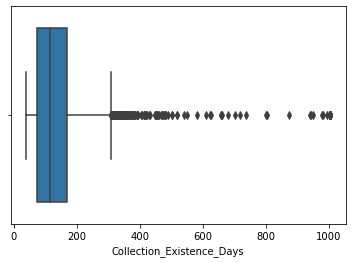

In [24]:
sns.boxplot(df_before_clean['Collection_Existence_Days'])

<AxesSubplot:xlabel='Twitter_Existence_Days'>

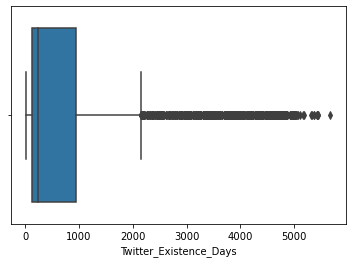

In [25]:
sns.boxplot(df_before_clean['Twitter_Existence_Days'])

<AxesSubplot:xlabel='Floor_Price'>

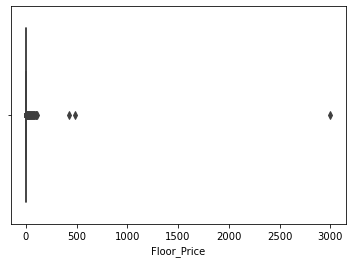

In [26]:
sns.boxplot(df_before_clean['Floor_Price'])

In [27]:
# Q1 = np.percentile(df_before_clean["Daily_Avg_Volume"], 25)
# Q3 = np.percentile(df_before_clean["Daily_Avg_Volume"], 75)
# IQR = Q3 - Q1
# Daily_Avg_Volume_outlier_rows = df_before_clean[(df_before_clean["Daily_Avg_Volume"] < Q1 - 1.5*IQR) | (df_before_clean["Daily_Avg_Volume"] > Q3 + 1.5*IQR )].index
# ##Outliers check

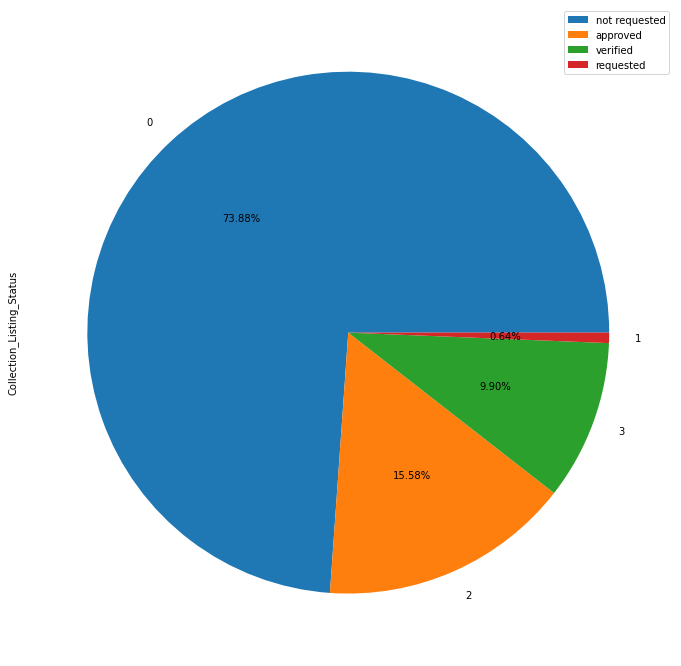

In [28]:
df_before_clean["Collection_Listing_Status"].value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(28,12)) 
plt.legend(loc=1, labels=['not requested','approved','verified','requested'])
# Showing listing status of collections on opensea :
    # 0 - not requested for approval
    # 1 - requested for approval , but still pending
    # 2 - approved 
    # 3 - verified (Only collectios above 100 ETH floor price)

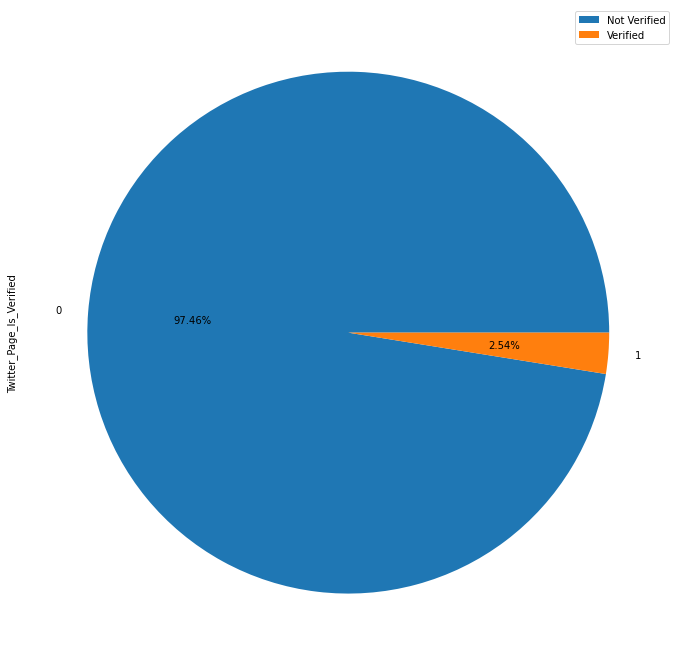

In [29]:
df_before_clean["Twitter_Page_Is_Verified"].value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(28,12)) 
plt.legend(loc=1, labels=['Not Verified','Verified'])
# showing twitter accounts of collections :
 # 0 - not verified twitter account 
  # 1 - verified twitter account

In [30]:
Categories_list = df_before_clean.columns[1:10]

In [31]:
dict_category = {}
art_sum = 0
collect_sum = 0
domain_sum = 0
photo_sum = 0
sports_sum = 0
cards_sum = 0
utility_sum = 0
virtual_sum = 0
music_sum = 0
for category_name in Categories_list:
    for cell in df_before_clean[category_name]:
        if(category_name == 'Category_Art' and cell == 1):
            art_sum+=1
        if(category_name == 'Category_Collectibles' and cell == 1):
            collect_sum+=1
        if(category_name == 'Category_Domain Names' and cell == 1):
            domain_sum+=1
        if(category_name == 'Category_Photography' and cell == 1):
            photo_sum+=1
        if(category_name == 'Category_Sports' and cell == 1):
            sports_sum+=1
        if(category_name == 'Category_Trading Cards' and cell == 1):
            cards_sum+=1
        if(category_name == 'Category_Utility' and cell == 1):
            utility_sum+=1
        if(category_name == 'Category_Virtual Worlds' and cell == 1):
            virtual_sum+=1
        if(category_name == 'Category_Music' and cell == 1):
            music_sum+=1    

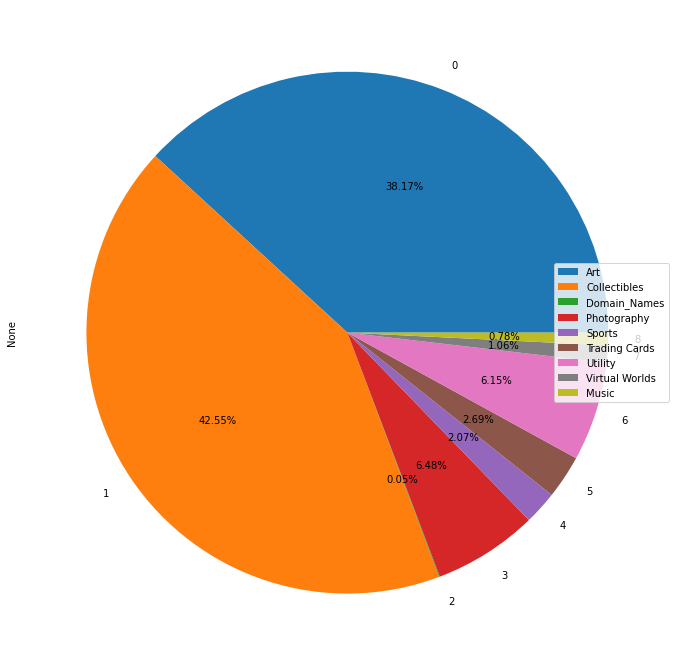

In [32]:
List = [art_sum,collect_sum,domain_sum,photo_sum,sports_sum,cards_sum,utility_sum,virtual_sum,music_sum]
ser = pd.Series(List)
ser.plot(kind='pie', autopct='%0.2f%%',figsize=(28,12))
plt.legend(loc=5, labels=['Art','Collectibles','Domain_Names','Photography','Sports','Trading Cards','Utility','Virtual Worlds','Music'])
plt.show()


# By showing the categories collections pie chart , we can see that Art and Collectibels are dominating the Nft Space.


In [33]:
ct = pd.crosstab(df_before_clean['Collection_Listing_Status'],df_before_clean['Twitter_Page_Is_Verified'],normalize='index')

Text(0, 0.5, 'frequency')

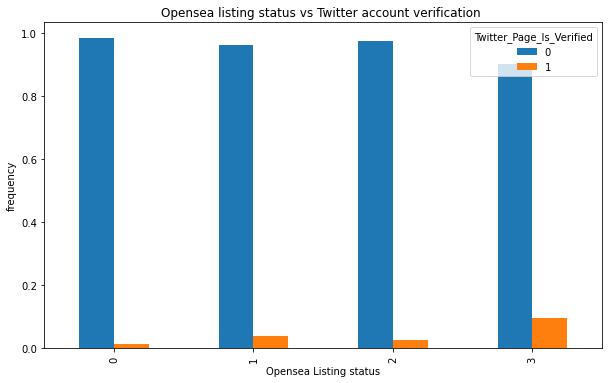

In [34]:
ct.plot(kind='bar',figsize=(10,6))
plt.title('Opensea listing status vs Twitter account verification ')
plt.xlabel('Opensea Listing status')
plt.ylabel('frequency')


## We can see that collections with status "3" on opensea are more likely to be with a verified twitter account 

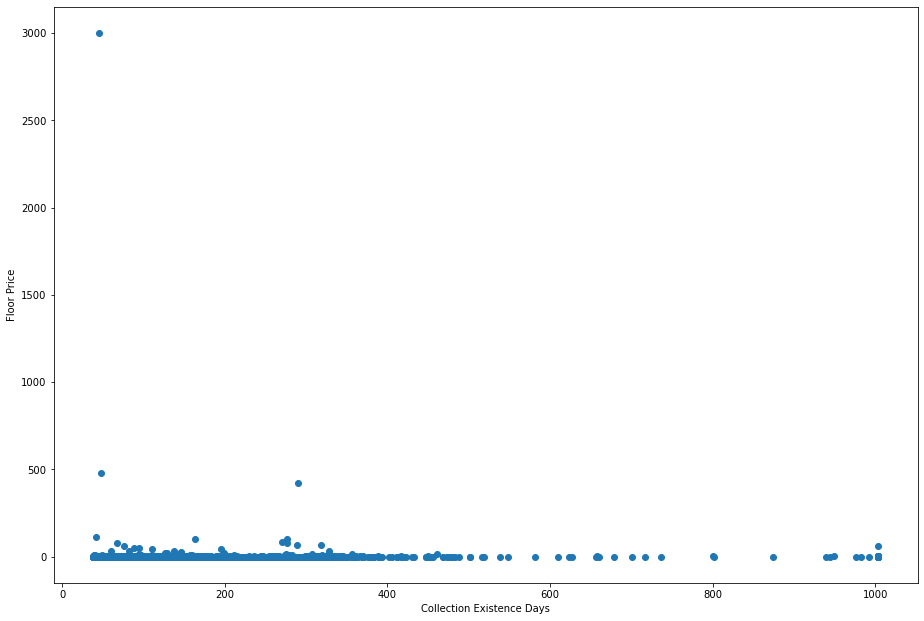

In [35]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean.Collection_Existence_Days,df_before_clean.Floor_Price)
plt.xlabel('Collection Existence Days')
plt.ylabel('Floor Price')
plt.show()

In [36]:
df_before_clean_copy = df_before_clean.copy()

In [37]:
df_before_clean_copy.drop([552,3036,3238],inplace=True)

In [38]:
df_before_clean_copy.reset_index(drop=True,inplace=True)

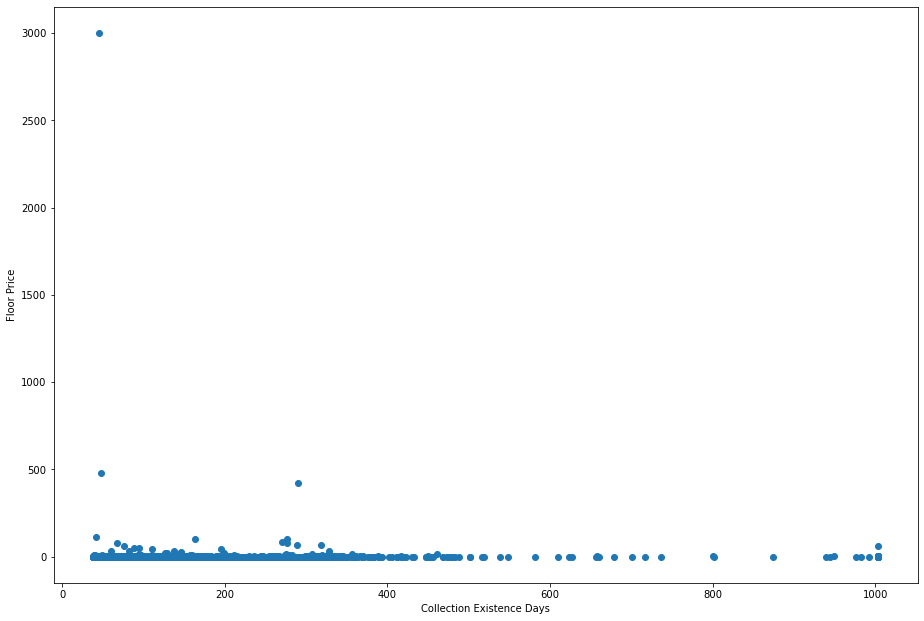

In [39]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean.Collection_Existence_Days,df_before_clean.Floor_Price)
plt.xlabel('Collection Existence Days')
plt.ylabel('Floor Price')
plt.show()

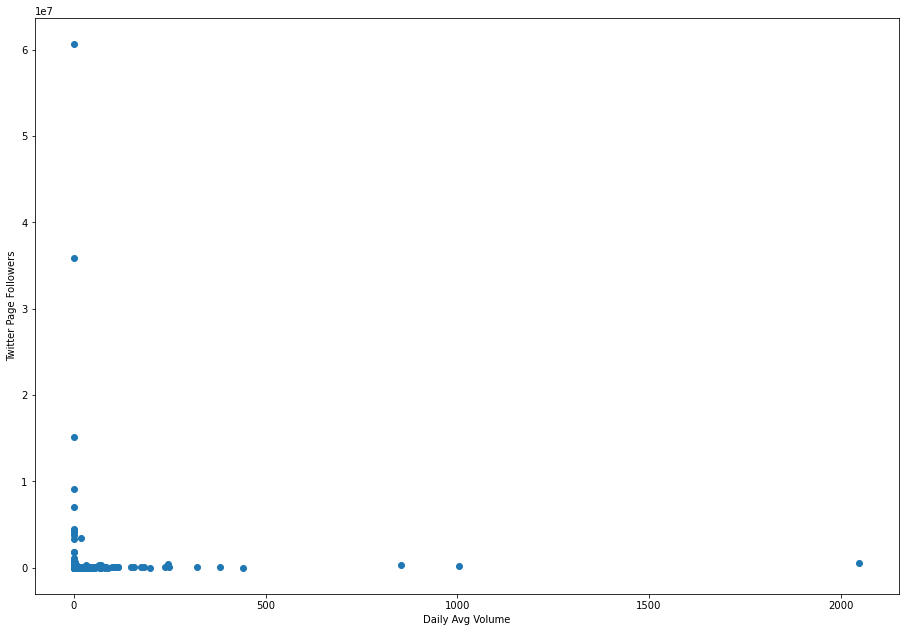

In [40]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean_copy.Daily_Avg_Volume,df_before_clean_copy.Twitter_Page_Followers)
plt.xlabel('Daily Avg Volume')
plt.ylabel('Twitter Page Followers')
plt.show()

In [41]:
counter=0
list_index = []
for x in df_before_clean_copy.Twitter_Page_Followers:
    counter+=1
    if(x>1000000):
        print(x,"   index--",counter)
        list_index.append(counter-1)                

1755384.0    index-- 8
3295498.0    index-- 498
60644694.0    index-- 539
4086796.0    index-- 677
15167692.0    index-- 841
9105552.0    index-- 1076
3456617.0    index-- 2173
7072125.0    index-- 2456
1112366.0    index-- 2716
4397590.0    index-- 3387
1818586.0    index-- 3409
3793148.0    index-- 3425
35906451.0    index-- 3734
4508597.0    index-- 3784


In [42]:
counter=0
list_index_2 = []
for x in df_before_clean_copy.Daily_Avg_Volume:
    counter+=1
    if(x>500):
        print(x,"   index--",counter)
        list_index_2.append(counter-1)

2048.966686    index-- 699
852.546511    index-- 850
1005.6915    index-- 1376


In [43]:
df_before_clean_copy.drop(list_index,inplace=True)
df_before_clean_copy.drop(list_index_2,inplace=True)
df_before_clean_copy.reset_index(drop=True,inplace=True)

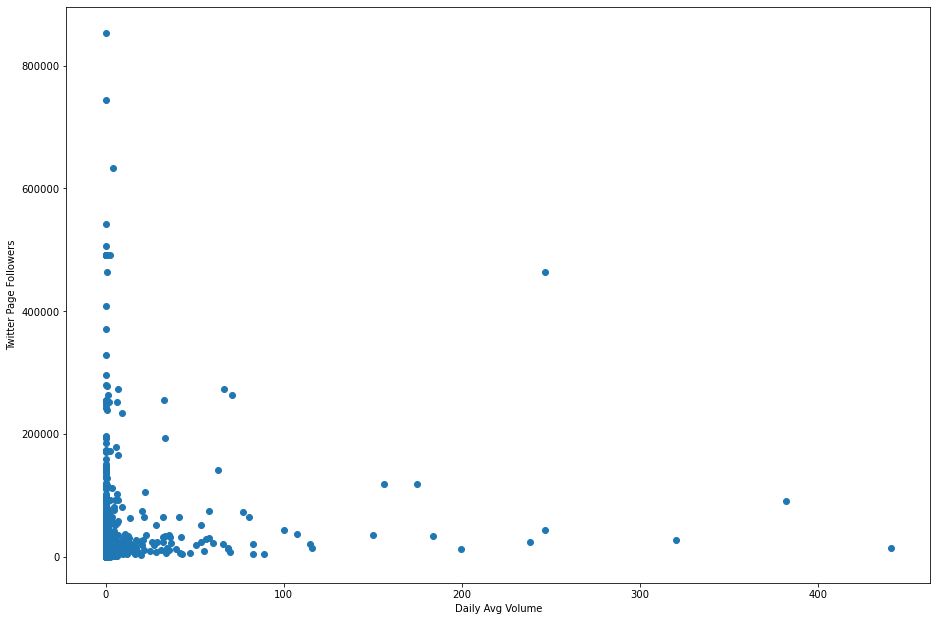

In [44]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean_copy.Daily_Avg_Volume,df_before_clean_copy.Twitter_Page_Followers)
plt.xlabel('Daily Avg Volume')
plt.ylabel('Twitter Page Followers')
plt.show()

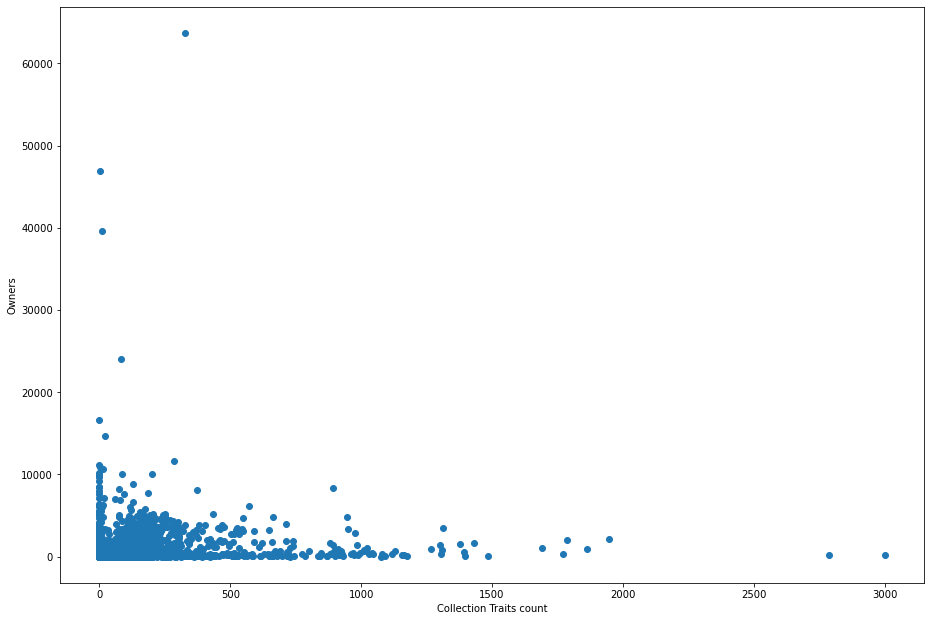

In [45]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean_copy.Collection_Traits_count,df_before_clean_copy.Owners)
plt.xlabel('Collection Traits count')
plt.ylabel('Owners')
plt.show()

In [46]:
counter=0
list_index_3 = []
for x in df_before_clean_copy.Owners:
    counter+=1
    if(x>10000):
        print(x,"   index--",counter)
        list_index_3.append(counter-1)

11600.0    index-- 1400
10700.0    index-- 1530
10200.0    index-- 1643
39600.0    index-- 1738
10900.0    index-- 1940
63700.0    index-- 1951
11100.0    index-- 2158
16600.0    index-- 2185
46900.0    index-- 3090
24000.0    index-- 3390
14700.0    index-- 3517


In [47]:
counter=0
list_index_4 = []
for x in df_before_clean_copy.Collection_Traits_count:
    counter+=1
    if(x>1500):
        print(x,"   index--",counter)
        list_index_4.append(counter-1)

2787.0    index-- 170
1946.0    index-- 375
1863.0    index-- 1970
1692.0    index-- 3363
1772.0    index-- 3496
1786.0    index-- 3633
3000.0    index-- 3651


In [48]:
df_before_clean_copy.drop(list_index_3,inplace=True)
df_before_clean_copy.drop(list_index_4,inplace=True)
df_before_clean_copy.reset_index(drop=True,inplace=True)

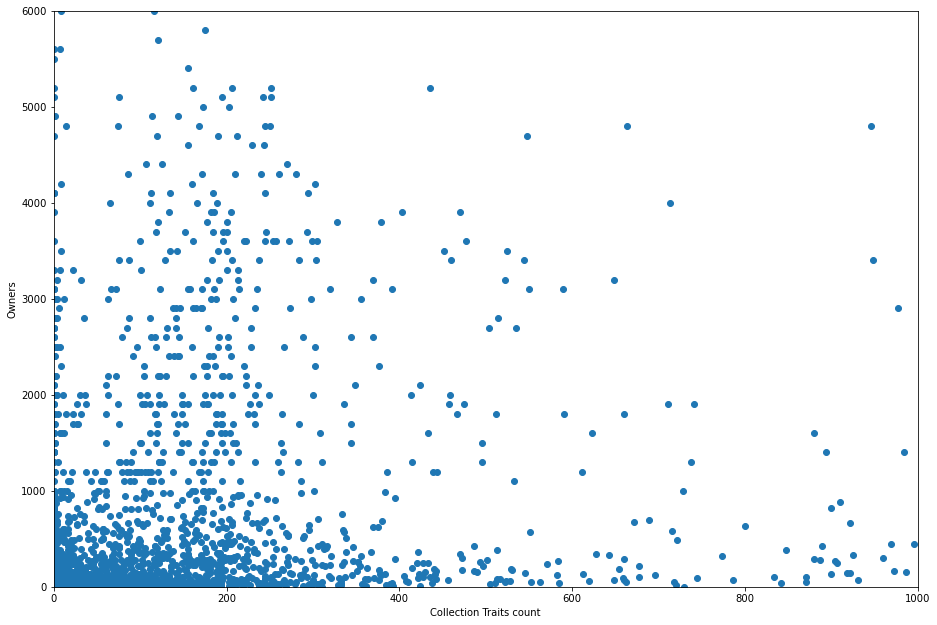

In [49]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean_copy.Collection_Traits_count,df_before_clean_copy.Owners)
plt.xlabel('Collection Traits count')
plt.ylabel('Owners')
plt.xlim(0,1000)
plt.ylim(0,6000)
plt.show()

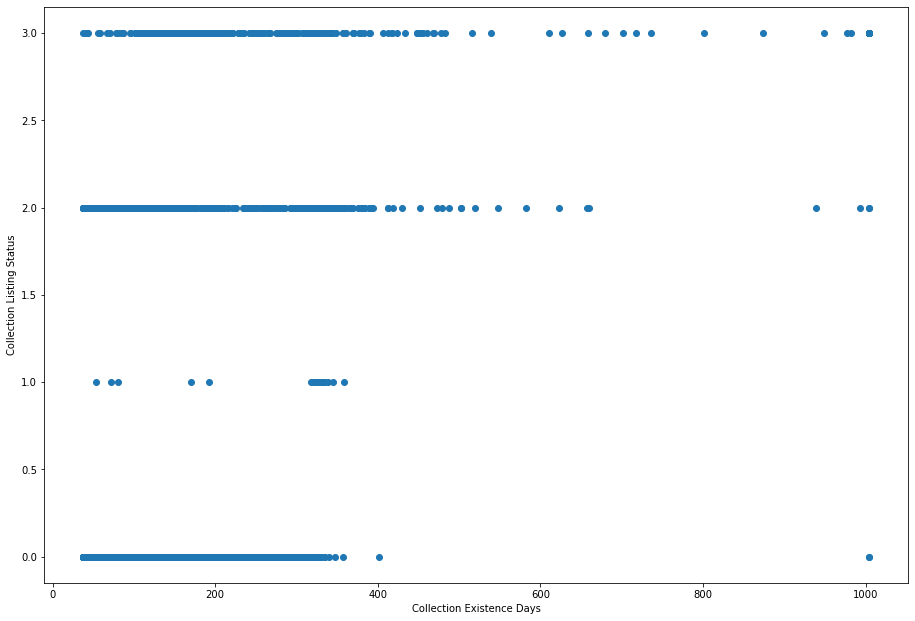

In [50]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean_copy.Collection_Existence_Days,df_before_clean_copy.Collection_Listing_Status)
plt.xlabel('Collection Existence Days')
plt.ylabel('Collection Listing Status')
plt.show()

## we can see that collections that exists more than 400 days are more likely to be approved/verified status.

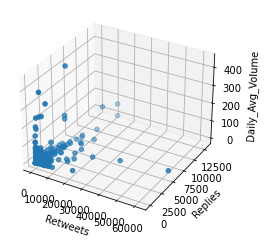

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_before_clean_copy.Max_Twitter_Retweets,df_before_clean_copy.Max_Twitter_Replies,df_before_clean_copy.Daily_Avg_Volume)
ax.set_xlabel("Retweets")
ax.set_ylabel("Replies")
ax.set_zlabel("Daily_Avg_Volume")
plt.show()




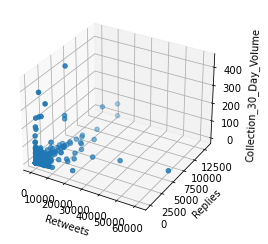

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_before_clean_copy.Max_Twitter_Retweets,df_before_clean_copy.Max_Twitter_Replies,df_before_clean_copy.Daily_Avg_Volume)
ax.set_xlabel("Retweets")
ax.set_ylabel("Replies")
ax.set_zlabel("Collection_30_Day_Volume")
plt.show()


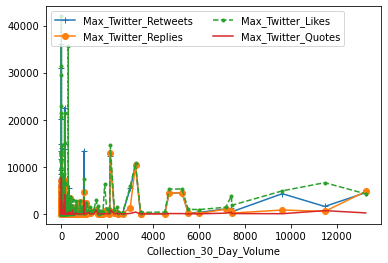

In [53]:
twitter_enagnemet=df_before_clean_copy.groupby(['Collection_30_Day_Volume']).mean()[['Max_Twitter_Retweets', 'Max_Twitter_Replies', 'Max_Twitter_Likes','Max_Twitter_Quotes']]
twitter_enagnemet.plot(style=['+-','o-','.--']).legend(loc='upper left', ncol=2)


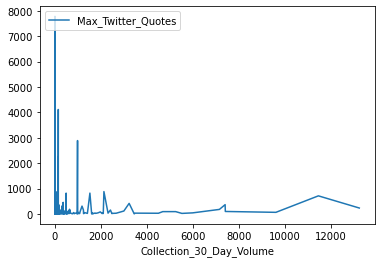

In [54]:
twitter_enagnemet=df_before_clean_copy.groupby(['Collection_30_Day_Volume']).mean()[['Max_Twitter_Quotes']]
twitter_enagnemet.plot().legend(loc='upper left', ncol=2)

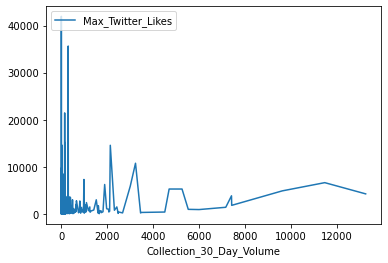

In [55]:
twitter_enagnemet=df_before_clean_copy.groupby(['Collection_30_Day_Volume']).mean()[['Max_Twitter_Likes']]
twitter_enagnemet.plot().legend(loc='upper left', ncol=2)

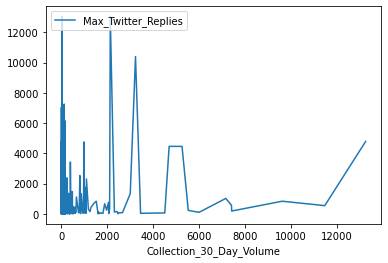

In [56]:
twitter_enagnemet=df_before_clean_copy.groupby(['Collection_30_Day_Volume']).mean()[['Max_Twitter_Replies',]]
twitter_enagnemet.plot().legend(loc='upper left', ncol=2)

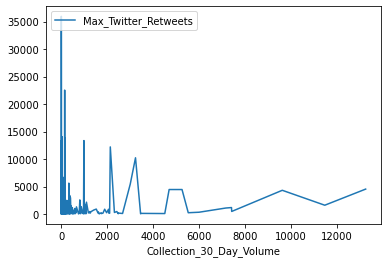

In [57]:
twitter_enagnemet=df_before_clean_copy.groupby(['Collection_30_Day_Volume']).mean()[['Max_Twitter_Retweets']]
twitter_enagnemet.plot().legend(loc='upper left', ncol=2)

In [58]:
## we can see that replies on twitter have the most effect on collections volume out of all twitter engagemnet 
# metrics.

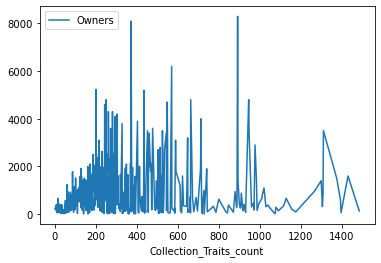

In [59]:
traits_=df_before_clean_copy.groupby(['Collection_Traits_count']).mean()[['Owners']]
traits_.plot().legend(loc='upper left', ncol=2)

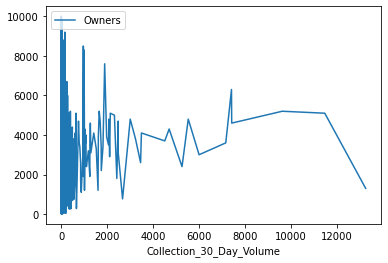

In [60]:
vol_=df_before_clean_copy.groupby(['Collection_30_Day_Volume']).mean()[['Owners']]
vol_.plot().legend(loc='upper left', ncol=2)

# We can see that collections with high volume are collections that dont have many owners,
# meaning that a buyer of those colletions is buying big quantity and not few.

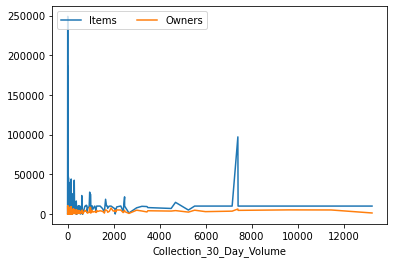

In [61]:
vol_owners_items=df_before_clean_copy.groupby(['Collection_30_Day_Volume']).mean()[['Items', 'Owners']]
vol_owners_items.plot().legend(loc='upper left', ncol=2)

(0.0, 15000.0, 0.0, 15000.0)

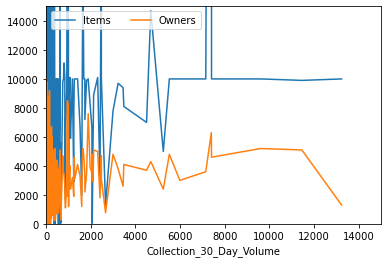

In [62]:
vol_owners_items=df_before_clean_copy.groupby(['Collection_30_Day_Volume']).mean()[['Items', 'Owners']]
vol_owners_items.plot().legend(loc='upper left', ncol=2)
plt.axis([0,15000,0, 15000])

# we can confirm from the last plot and from that one that collections with the highest volume are collections 
# with not many owners and in the range of 10k items per collections in relate to other collections 
#with less than 10k itmes

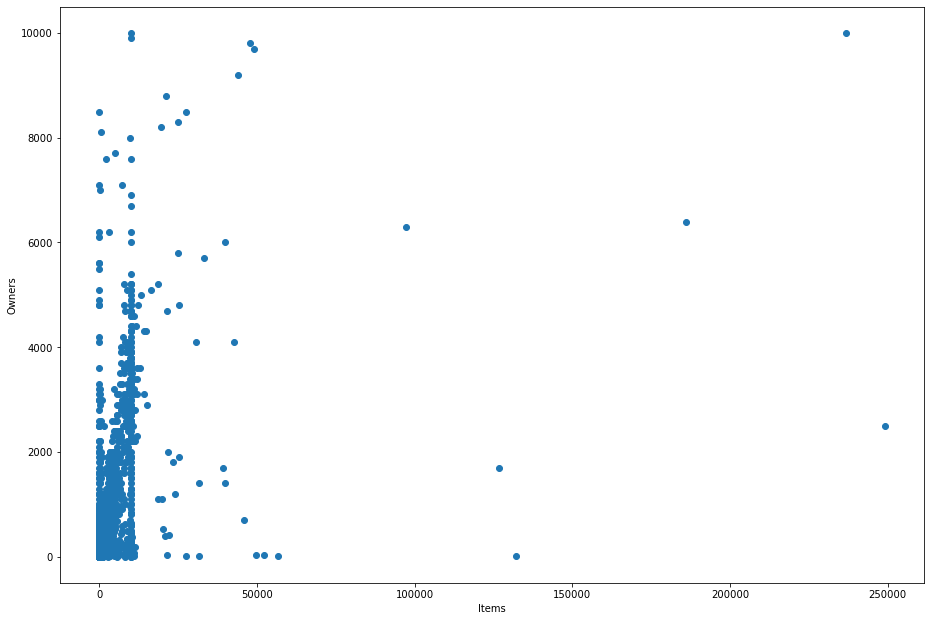

In [63]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean_copy.Items,df_before_clean_copy.Owners)
plt.xlabel('Items')
plt.ylabel('Owners')
plt.show()

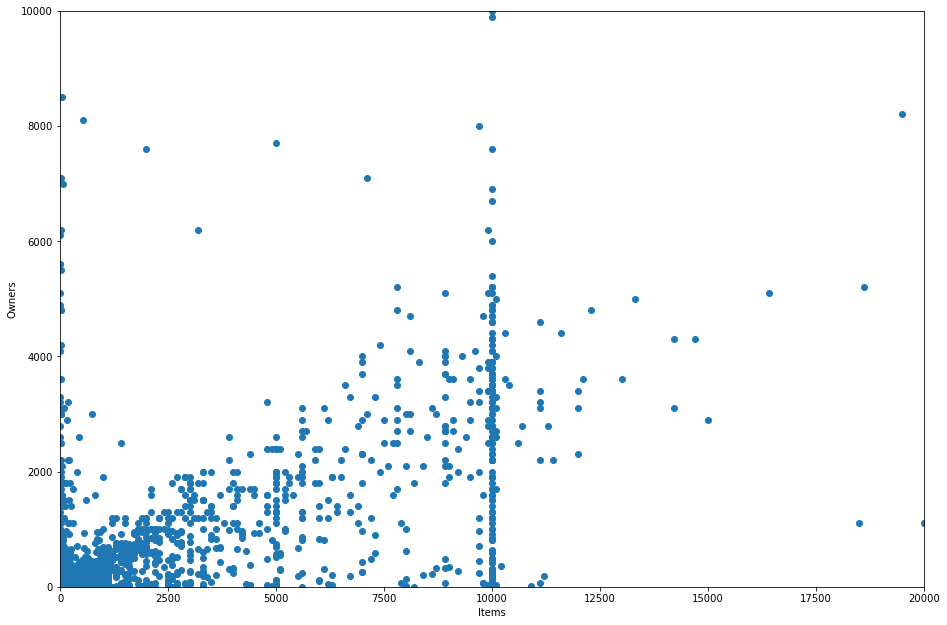

In [64]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean_copy.Items,df_before_clean_copy.Owners)
plt.xlabel('Items')
plt.ylabel('Owners')
plt.axis([0,20000,0, 10000])
plt.show()

# we can see a spike in collections with 10k items that have a variety ownerships , 
# that makes our opinion before even stronger that 10k collections have the most intrest in this market!

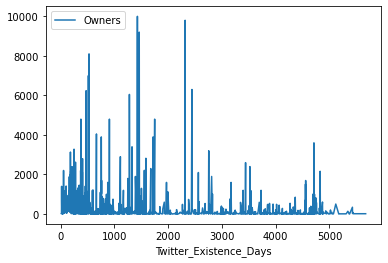

In [65]:
vol_owners_items=df_before_clean_copy.groupby(['Twitter_Existence_Days']).mean()[['Owners']]
vol_owners_items.plot().legend(loc='upper left', ncol=2)

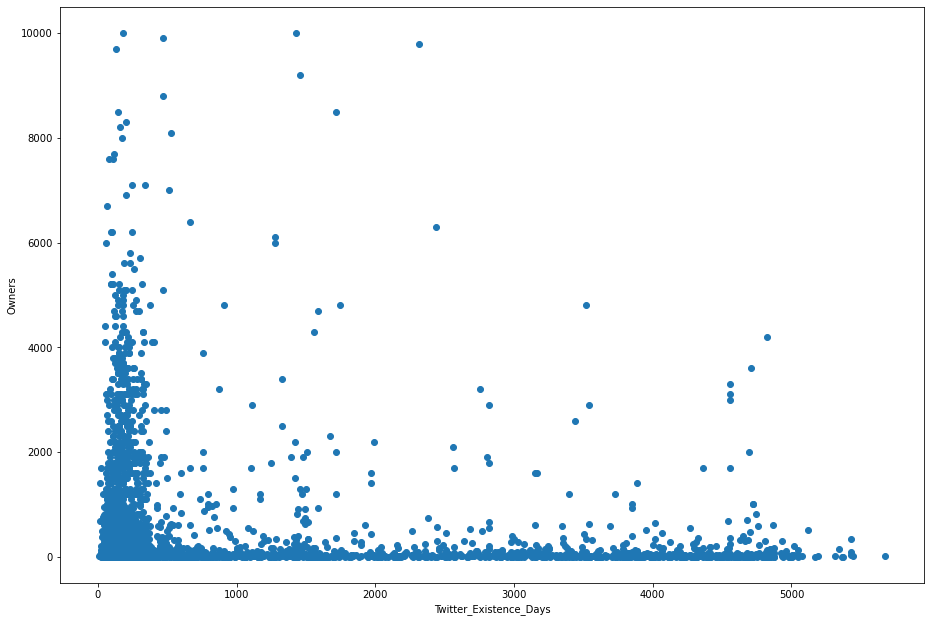

In [66]:
fig = plt.figure()
ax = plt.axes([2,2,2,2])
ax.scatter(df_before_clean_copy.Twitter_Existence_Days,df_before_clean_copy.Owners)
plt.xlabel('Twitter_Existence_Days')
plt.ylabel('Owners')
#plt.axis([0,20000,0, 10000])
plt.show()

# The spike in the beginning means that we can see that collections that their twitter page is new 
#have more owners than collections that their twitter page exists longer period of time.
# in our opinion that means that new collections have more "hype" around them that makes many people want to buy,
# but only few items per person rather than collections that their twitter page exists more time that have 
# significantly less owners which means that investors of those collections are buying bigger quantity per person ,
# an opinion that we talked about already in previous plots.

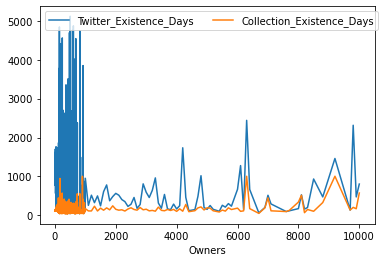

In [67]:
vol_owners_items=df_before_clean_copy.groupby(['Owners']).mean()[['Twitter_Existence_Days','Collection_Existence_Days']]
vol_owners_items.plot().legend(loc='upper left', ncol=2)

# same as before only difference is that we now added the collections existence days into the plot
# and we can see sort of match between the twitter page existence days  and collection existence days 
# which Strengthen our conclusion from before.

<AxesSubplot:>

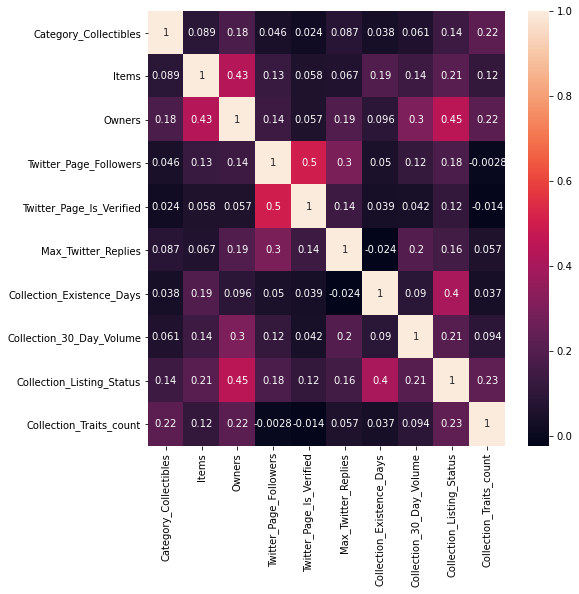

In [91]:
fig, ax = plt.subplots(figsize=(8,8))
df_heatmap = pd.DataFrame(df_before_clean_copy, columns = [ 'Category_Collectibles',
                                                            'Items', 'Owners',
       'Twitter_Page_Followers',
       'Twitter_Page_Is_Verified',
       'Max_Twitter_Replies', 'Collection_Existence_Days',
       'Collection_30_Day_Volume', 'Collection_Listing_Status',
       'Collection_Traits_count'])
sns.heatmap(df_heatmap.corr(), annot=True,ax=ax)

In [94]:
mean_daily_avg = df_before_clean_copy['Daily_Avg_Volume'].mean()

In [103]:
collections_volume_that_bigger_than_avg = []
counter=0
for collection_daily_vol in df_before_clean_copy['Daily_Avg_Volume']:
    if(collection_daily_vol > mean_daily_avg):
        counter+=1
        collections_volume_that_bigger_than_avg.append(1)
    else:
        collections_volume_that_bigger_than_avg.append(0)       

In [104]:
df_before_clean_copy['Volume_Is_Bigger_Than_DailyAvg'] = collections_volume_that_bigger_than_avg

In [107]:
df_ready_for_prediction = df_before_clean_copy.copy()

In [108]:
df_ready_for_prediction.to_csv('df_ready_for_prediction.csv')